# Applied Data Science Capstone project

### Business Understanding/Introduction

*The data I had is about accidents in Seattle city. With the data we have, we can predict the severity of the accident. So my attempt here or problem I choose here is to derive the severity of the accident. Generally in accidents, the primary things we would verify are road condition and visibility on the road and sometimes the weather plays a major role especially during rains and winter. Besides these speeding is the key indicator to judge the accident's cause. As all this information is there in that Seattle accidents data.*

**Data source:** https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
!wget -O Datacollisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
df = pd.read_csv('Datacollisions.csv')

--2020-09-02 20:11:47--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Datacollisions.csv’

100%[======================================>] 73,917,638  35.9MB/s   in 2.0s   

2020-09-02 20:11:50 (35.9 MB/s) - ‘Datacollisions.csv’ saved [73917638/73917638]



/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
df['SEVERITYCODE'].isnull().value_counts()

False    194673
Name: SEVERITYCODE, dtype: int64

In [5]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

**We need to balance the dataset for both the classifiers to prevent the bias towards Severty code '1'**

In [6]:
df_sevcode1 = df[df['SEVERITYCODE'] == 1]
df_sevcode2 = df[df['SEVERITYCODE'] == 2]
pre_recsize = 0
if (df_sevcode1.shape[0]>df_sevcode2.shape[0]):
    pre_recsize=df_sevcode2.shape[0]
else:
    df_sevcode1.shape[0]
df=pd.concat([df_sevcode1.sample(pre_recsize), df_sevcode2])
#df['SEVERITYCODE'].value_counts()
df.shape

(116376, 38)

In [7]:
df['SEVERITYCODE'].value_counts()

2    58188
1    58188
Name: SEVERITYCODE, dtype: int64

*Replacing the missing data with Unknown category values*

In [8]:
df['WEATHER'] = df['WEATHER'].replace(np.nan,'WeatherUnknown')
df['WEATHER'] = df['WEATHER'].replace('Unknown','WeatherUnknown')
df['ROADCOND'] = df['ROADCOND'].replace(np.nan,'RoadUnknown')
df['ROADCOND'] = df['ROADCOND'].replace('Unknown','RoadUnknown')
df['LIGHTCOND'] = df['LIGHTCOND'].replace(np.nan,'LightUnknown')
df['LIGHTCOND'] = df['LIGHTCOND'].replace('Unknown','LightUnknown')
df['ADDRTYPE'] = df['ADDRTYPE'].replace(np.nan,'AddrUnknown')
df['ADDRTYPE'] = df['ADDRTYPE'].replace('Unknown','AddrUnknown')
df['SPEEDING'] = df['SPEEDING'].replace(np.nan,'N')
df['ST_COLCODE'] = df['ST_COLCODE'].replace(np.nan,0)
df['ST_COLCODE'] = df['ST_COLCODE'].replace(' ',0)
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
101719,1,-122.325986,47.571408,111896,127044,127044,3546109,Matched,Intersection,32343.0,6TH AVE S AND S SPOKANE SR ST,NaN,NaN,1,Property Damage Only Collision,Angles,2,0,0,2,2011/08/27 00:00:00+00,8/27/2011 7:44:00 AM,At Intersection (intersection related),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,N,Clear,Dry,Daylight,NaN,11239005.0,N,10,Entering at angle,0,0,N
132458,1,-122.304337,47.578353,147256,170148,170168,3580679,Matched,Intersection,31630.0,22ND AVE S AND S MCCLELLAN ST,,NaN,1,Property Damage Only Collision,Angles,3,0,0,2,2014/06/13 00:00:00+00,6/13/2014 12:39:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Y,N,Overcast,Dry,Daylight,NaN,NaN,N,10,Entering at angle,0,0,N
187736,1,-122.347933,47.725037,211462,319365,320865,E924065,Matched,Block,NaN,LINDEN AVE N BETWEEN N 130TH ST AND N 135TH ST,,NaN,1,Property Damage Only Collision,Other,2,0,0,1,2019/05/26 00:00:00+00,5/26/2019 1:14:00 PM,Mid-Block (not related to intersection),26,MOTOR VEHICLE STRUCK OBJECT IN ROAD,NaN,N,Clear,Dry,Daylight,NaN,NaN,N,50,Fixed object,0,0,N
174303,1,-122.358813,47.708732,195497,271480,272320,3754436,Matched,Block,NaN,NW 110TH ST BETWEEN 1ST AVE NW AND 2ND AVE NW,,NaN,1,Property Damage Only Collision,Other,2,0,0,1,2018/02/17 00:00:00+00,2/17/2018 10:23:00 PM,Mid-Block (not related to intersection),26,MOTOR VEHICLE STRUCK OBJECT IN ROAD,NaN,Y,Overcast,Dry,Dark - Street Lights On,NaN,NaN,N,50,Fixed object,0,0,N
123228,1,-122.266764,47.519845,136949,155726,155746,3643633,Matched,Block,NaN,RAINIER AVE S BETWEEN 52ND AVE S AND 53RD AVE S,,NaN,1,Property Damage Only Collision,Angles,2,0,0,2,2013/10/19 00:00:00+00,10/19/2013 10:15:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,N,10,Entering at angle,0,0,N


Selecting the important factors for model input, converting Categorical variables into numeric data for further processing and then applying the standard scaler for normalizing the data

In [36]:
from sklearn import preprocessing
label = df['SEVERITYCODE']
features = df[['WEATHER', 'ROADCOND', 'LIGHTCOND', 'ADDRTYPE', 'SPEEDING', 'ST_COLCODE']]
features_weather = pd.get_dummies(df['WEATHER'])
features_road = pd.get_dummies(df['ROADCOND'])
features_light = pd.get_dummies(df['LIGHTCOND'])
features_addrtype = pd.get_dummies(df['ADDRTYPE'])
features_speeding = pd.get_dummies(df['SPEEDING'])
features = pd.concat([features, features_weather, features_road, features_light, features_addrtype, features_speeding], axis=1)
features.drop(['WEATHER', 'ROADCOND', 'LIGHTCOND', 'ADDRTYPE', 'SPEEDING'], inplace = True,axis=1)
features['ST_COLCODE'] = features['ST_COLCODE'].astype('float')
features.reset_index()
features.fillna(0)
#np.any(np.isnan(features))
Features = features
features = preprocessing.StandardScaler().fit(features).transform(features)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:18: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.


In [12]:
from sklearn.model_selection import train_test_split
features_train, features_test, label_train, label_test = train_test_split( features, label, test_size=0.3)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k = 21
mean = np.zeros((k-1))
std = np.zeros((k-1))
for i in range(1,k):
    n = KNeighborsClassifier(n_neighbors = i).fit(features_test,label_test)
    labelhat = n.predict(features_test)
    mean[i-1] = metrics.accuracy_score(label_test, labelhat)    
    std[i-1]=np.std(labelhat==label_test)/np.sqrt(labelhat.shape[0])

mean

array([0.63738436, 0.65176295, 0.68066336, 0.69005814, 0.68799588,
       0.68467333, 0.68407184, 0.68937072, 0.68822502, 0.68727981,
       0.6921777 , 0.68831094, 0.7061553 , 0.69833586, 0.7022599 ,
       0.70039813, 0.70125741, 0.7007132 , 0.70165841, 0.69618767])

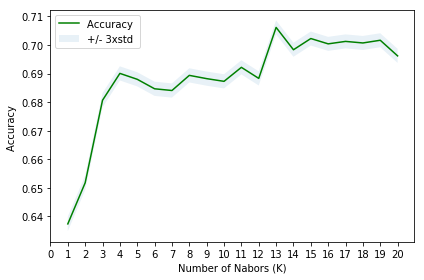

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.plot(range(1,k),mean,'g')
plt.fill_between(range(1,k),mean - 1 * std,mean + 1 * std, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.xticks(np.arange(0, k, 1))
plt.tight_layout()
plt.show()

In [20]:
print( "The best accuracy was with", mean.max(), "with k=", mean.argmax()+1) 
#knnModel = KNeighborsClassifier(n_neighbors = 7).fit(X_train,y_train)

The best accuracy was with 0.7061553003179332 with k= 13


In [21]:
knnModel = KNeighborsClassifier(n_neighbors = 13).fit(features_train,label_train)
label_test_hat = knnModel.predict(features_test)

In [44]:
#KNN
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
jc_knn = jaccard_similarity_score(label_test, label_test_hat)
f1_knn = f1_score(label_test,label_test_hat, average='weighted') 
print('jaccard_similarity_score for KNN ' + str(jc_knn))
print('f1_score for KNN ' + str(f1_knn))
metrics.accuracy_score(label_test, label_test_hat)

jaccard_similarity_score for KNN 0.70787385787529
f1_score for KNN 0.7067365701967236


0.70787385787529

In [45]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier(criterion="entropy")
dTree.fit(features_train,label_train)
label_test_hat = dTree.predict(features_test)
jc_dtree = jaccard_similarity_score(label_test, label_test_hat)
f1_dtree = f1_score(label_test,label_test_hat, average='weighted') 
print('jaccard_similarity_score for Decision Tree ' + str(jc_dtree))
print('f1_score for decision Tree ' + str(f1_dtree))
metrics.accuracy_score(label_test, label_test_hat)

jaccard_similarity_score for Decision Tree 0.7077306447455103
f1_score for decision Tree 0.7065896437085908


0.7077306447455103

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.268 to fit



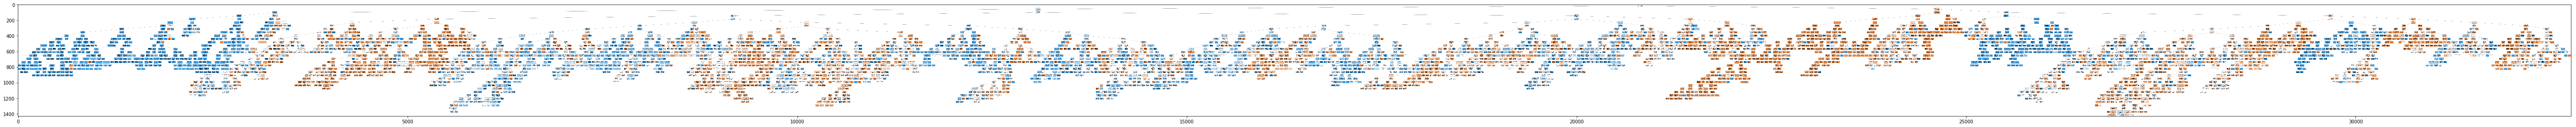

In [39]:
!pip install pydotplus
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 
dot_data = StringIO()
filename = "decisionTree.png"
featureNames = Features.columns.tolist()
targetNames = ['1', '2']
output=tree.export_graphviz(dTree,feature_names=featureNames, out_file=dot_data, class_names= targetNames, filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [47]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
LR = LogisticRegression(C=0.01, solver='liblinear').fit(features_train,label_train)
label_test_hat = LR.predict(features_test)
jc_log = jaccard_similarity_score(label_test, label_test_hat)
f1_log = f1_score(label_test, label_test_hat, average='weighted') 
logloss_log = log_loss(label_test, label_test_hat)
print('jaccard_similarity_score for Logistic Regression ' + str(jc_log))
print('f1_score for Logistic Regression ' + str(f1_log))
print('Log loss score for Logistic Regression ' + str(logloss_log))
metrics.accuracy_score(label_test, label_test_hat)

jaccard_similarity_score for Logistic Regression 0.6374989259015267
f1_score for Logistic Regression 0.6367822163478895
Log loss score for Logistic Regression 17.22279604876872


0.6374989259015267

In [53]:
print('Probability for LR predictions')
label_test_hat_prob = LR.predict_proba(features_test)
label_test_hat_prob

Probability for LR predictions


array([[0.42897589, 0.57102411],
       [0.29370943, 0.70629057],
       [0.49733268, 0.50266732],
       ...,
       [0.47057482, 0.52942518],
       [0.29780607, 0.70219393],
       [0.50843356, 0.49156644]])

In [54]:
#Support Vector Machine
from sklearn import svm
svm_model = svm.SVC(kernel='sigmoid')
svm_model.fit(features_train,label_train) 
label_test_hat = svm_model.predict(features_test)
jc_svm = jaccard_similarity_score(label_test, label_test_hat)
f1_svm = f1_score(label_test, label_test_hat, average='weighted') 
print('jaccard_similarity_score for SVM ' + str(jc_svm))
print('f1_score for SVM ' + str(f1_svm))
metrics.accuracy_score(label_test, label_test_hat)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


jaccard_similarity_score for SVM 0.5489645690716924
f1_score for SVM 0.5482374976652663


0.5489645690716924

**Based on all values on Jaccard index, F1 score & logloss for Logistic regression, I would prefer the KNN model classification for this with k value as 13 which was best from the range I have choosen from 1 to 20.**